Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (1)
## 13.04.2021. 

Pavle Šarenac 2020/0359
--

#### __Zadatak 1__: Model sa konstantnom brzinom
Simulirati model protoka saobraćaja sa konstantnom brzinom koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + v\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

a) Formirati Python skriptu koja primenom metode konačnih razlika rešava gornju jednačinu za sledeće parametre:
<br>
<ul>
    <li> Brzina automobila $v = 60$ km/h,</li>
    <li> Ukupna dužina posmatranog puta $L = 5$ km,</li>
    <li> Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li> Koraci diskretizacije: $\Delta x = 50$ m, $\Delta t = 0.1$ s.</li>
</ul>
Za rešavanje jednačine potrebno je poznavanje početnog uslova:

<ul>
    <li>$\rho(x,0) = 200$ $\text{km}^{-1}$ za $x \leq 0$,</li>
    <li>$\rho(x,0) = 0$ $\text{km}^{-1}$ za $x > 0$,</li>
</ul>

koji može imati smisao semafora koji u trenutku $t = 0$ na poziciji $x = 0$ uključuje zeleno svetlo.

Dodatno potrebno je i poznavanje graničnog uslova $\rho(0,t) = 200$ $\text{km}^{-1}$ za $t > 0$. 

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Šta je posledica konstatne brzine vozila?

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


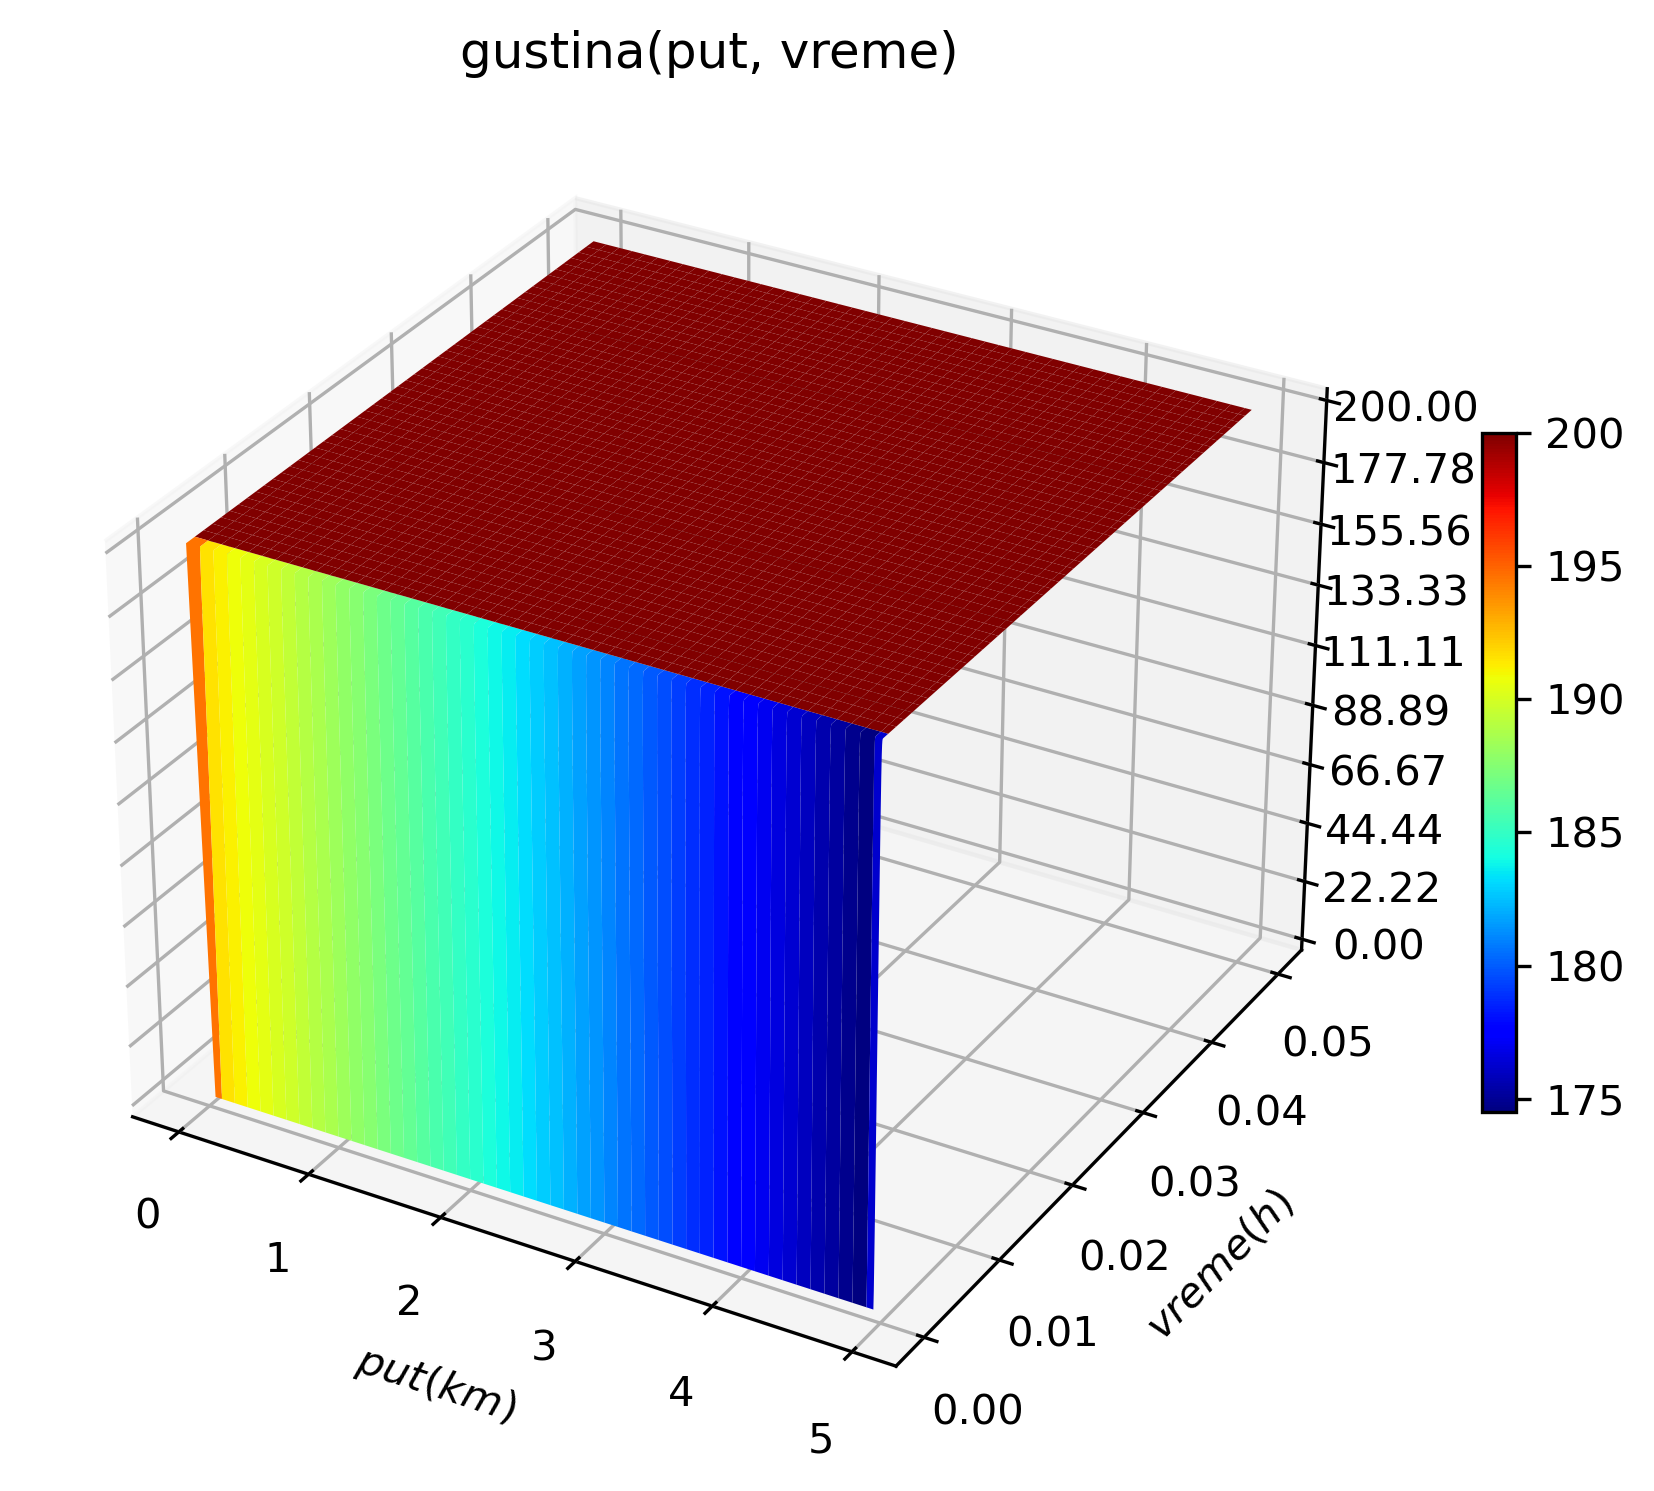

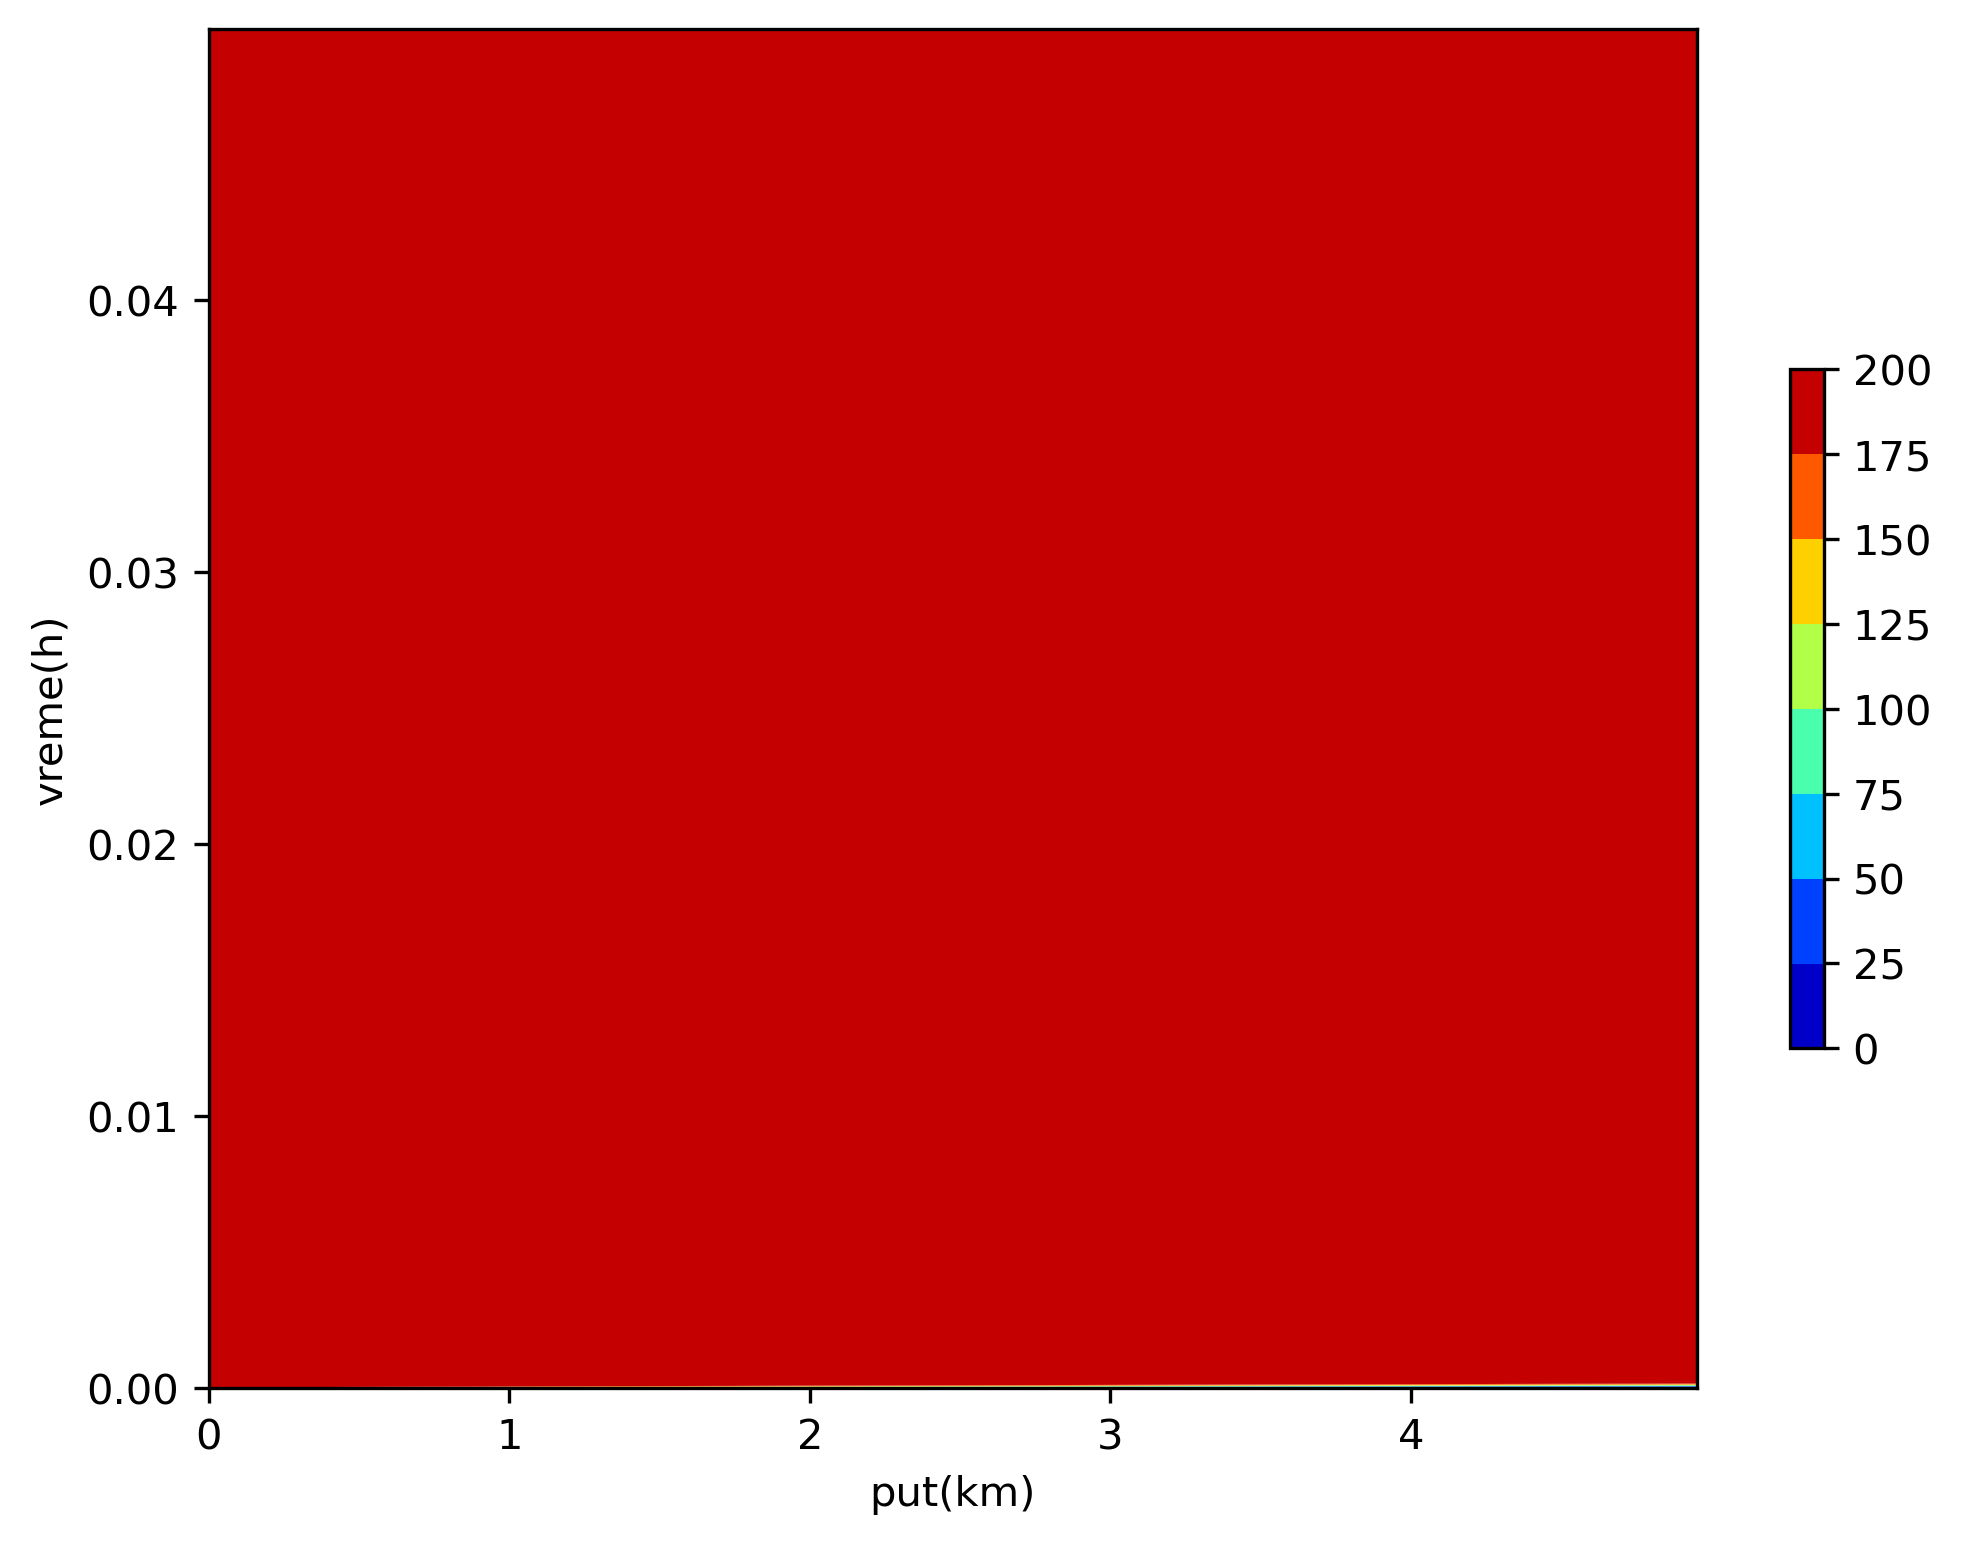

1800
1800


In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# parametri
brzina = 60   # 60km/h
ceoPut = 5   # 5km
vreme = 0.05   # 180s = 3min = 1/20h = 0.05h
deltaX = 0.05   # 50 m = 0.05km
deltaT = 0.1 * (1/3600) # u satima

izdeljenPut = np.arange(0, ceoPut, deltaX)
izdeljenoVreme = np.arange(0, vreme, deltaT)

pocetniUslov = 200
granicniUslov = 200   # konstantan priliv vozila

# gustina
gustina = np.zeros(shape=(len(izdeljenoVreme), len(izdeljenPut)))   # vreme redovi, put kolone

print(gustina)

gustina[0][0] = pocetniUslov
    
for i in range(len(gustina)):
    gustina[i][0] = granicniUslov

for i in range(1, len(gustina)):
    for j in range(1, len(gustina[i])):
        gustina[i][j] = gustina[i][j-1] - (brzina*deltaT)/deltaX * (gustina[i][j-1] - gustina[i-1][j])
        
izdeljenPut, izdeljenoVreme = np.meshgrid(izdeljenPut, izdeljenoVreme)

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.gca(projection='3d') # ose grafika - 3D projekcija
surf = ax.plot_surface(izdeljenPut, izdeljenoVreme, gustina, cmap=cm.jet, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10)) # podeli z-osu na 10 podeoka
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) # prikazuj vrednosti kao realne brojeve sa 2 decimale

# Dodavanje legende boja
fig.colorbar(surf, shrink=0.5, aspect=20) # da znamo koja boja je koja vrednost

# ispisivanje osa
ax.set_xlabel("$put(km)$")
ax.set_ylabel("$vreme(h)$")
ax.set_title("gustina(put, vreme)")

plt.show()

# konturni dijagram
fig = plt.figure(figsize=(8, 6), dpi=300)
cpl = plt.contourf(izdeljenPut, izdeljenoVreme, gustina, cmap=cm.jet, antialiased=True)

# dodavanje legende boja
fig.colorbar(cpl, shrink=0.5, aspect=20)
plt.xlabel("put(km)")
plt.ylabel("vreme(h)")
plt.show()

print(len(izdeljenPut))
print(len(izdeljenoVreme))

Zbog konstantne brzine vozila, posle nekog vremena i gustina postane konstantna.

b) Modelovati isti problem kao iz tačke a) kod koga je promenjen granični uslov, odnosno pretpostavljeno je da postoji semafor koji u trenutku $t = 60$ s uključuje crveno svetlo, a onda u trenutku $t = 120$ s, uključuje zeleno svetlo:
<ul>
    <li> $\rho(0,t) = 200$ $\text{km}^{-1}$ za $0 \leq t < 60$ i $t \geq 120$,</li>
    <li> $\rho(0,t) = 0$ $\text{km}^{-1}$ za $60 \leq t < 120$.</li>
</ul>

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Kako je promenjeni granični uslov uticao na rešenje?

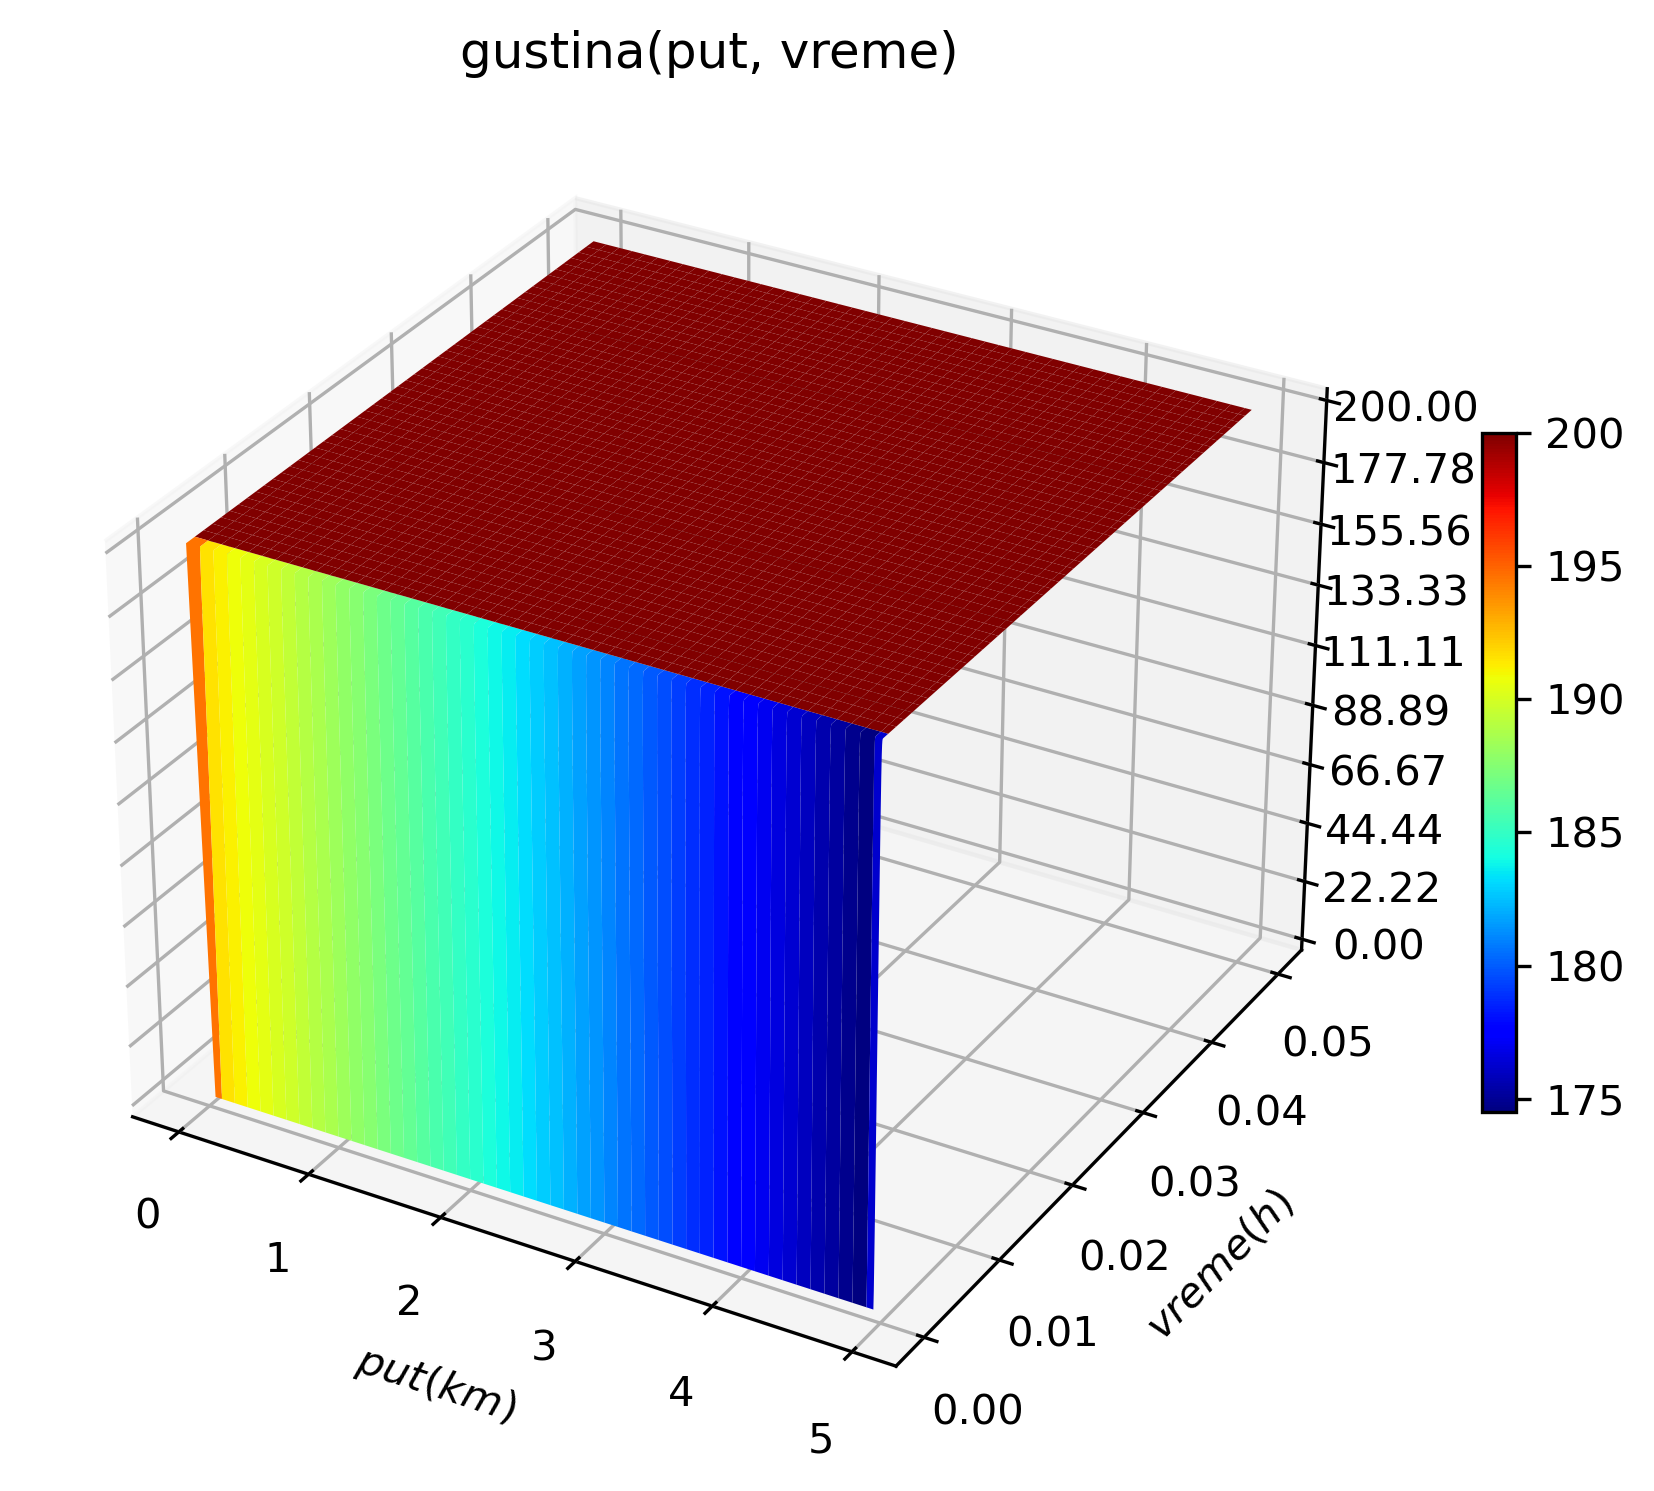

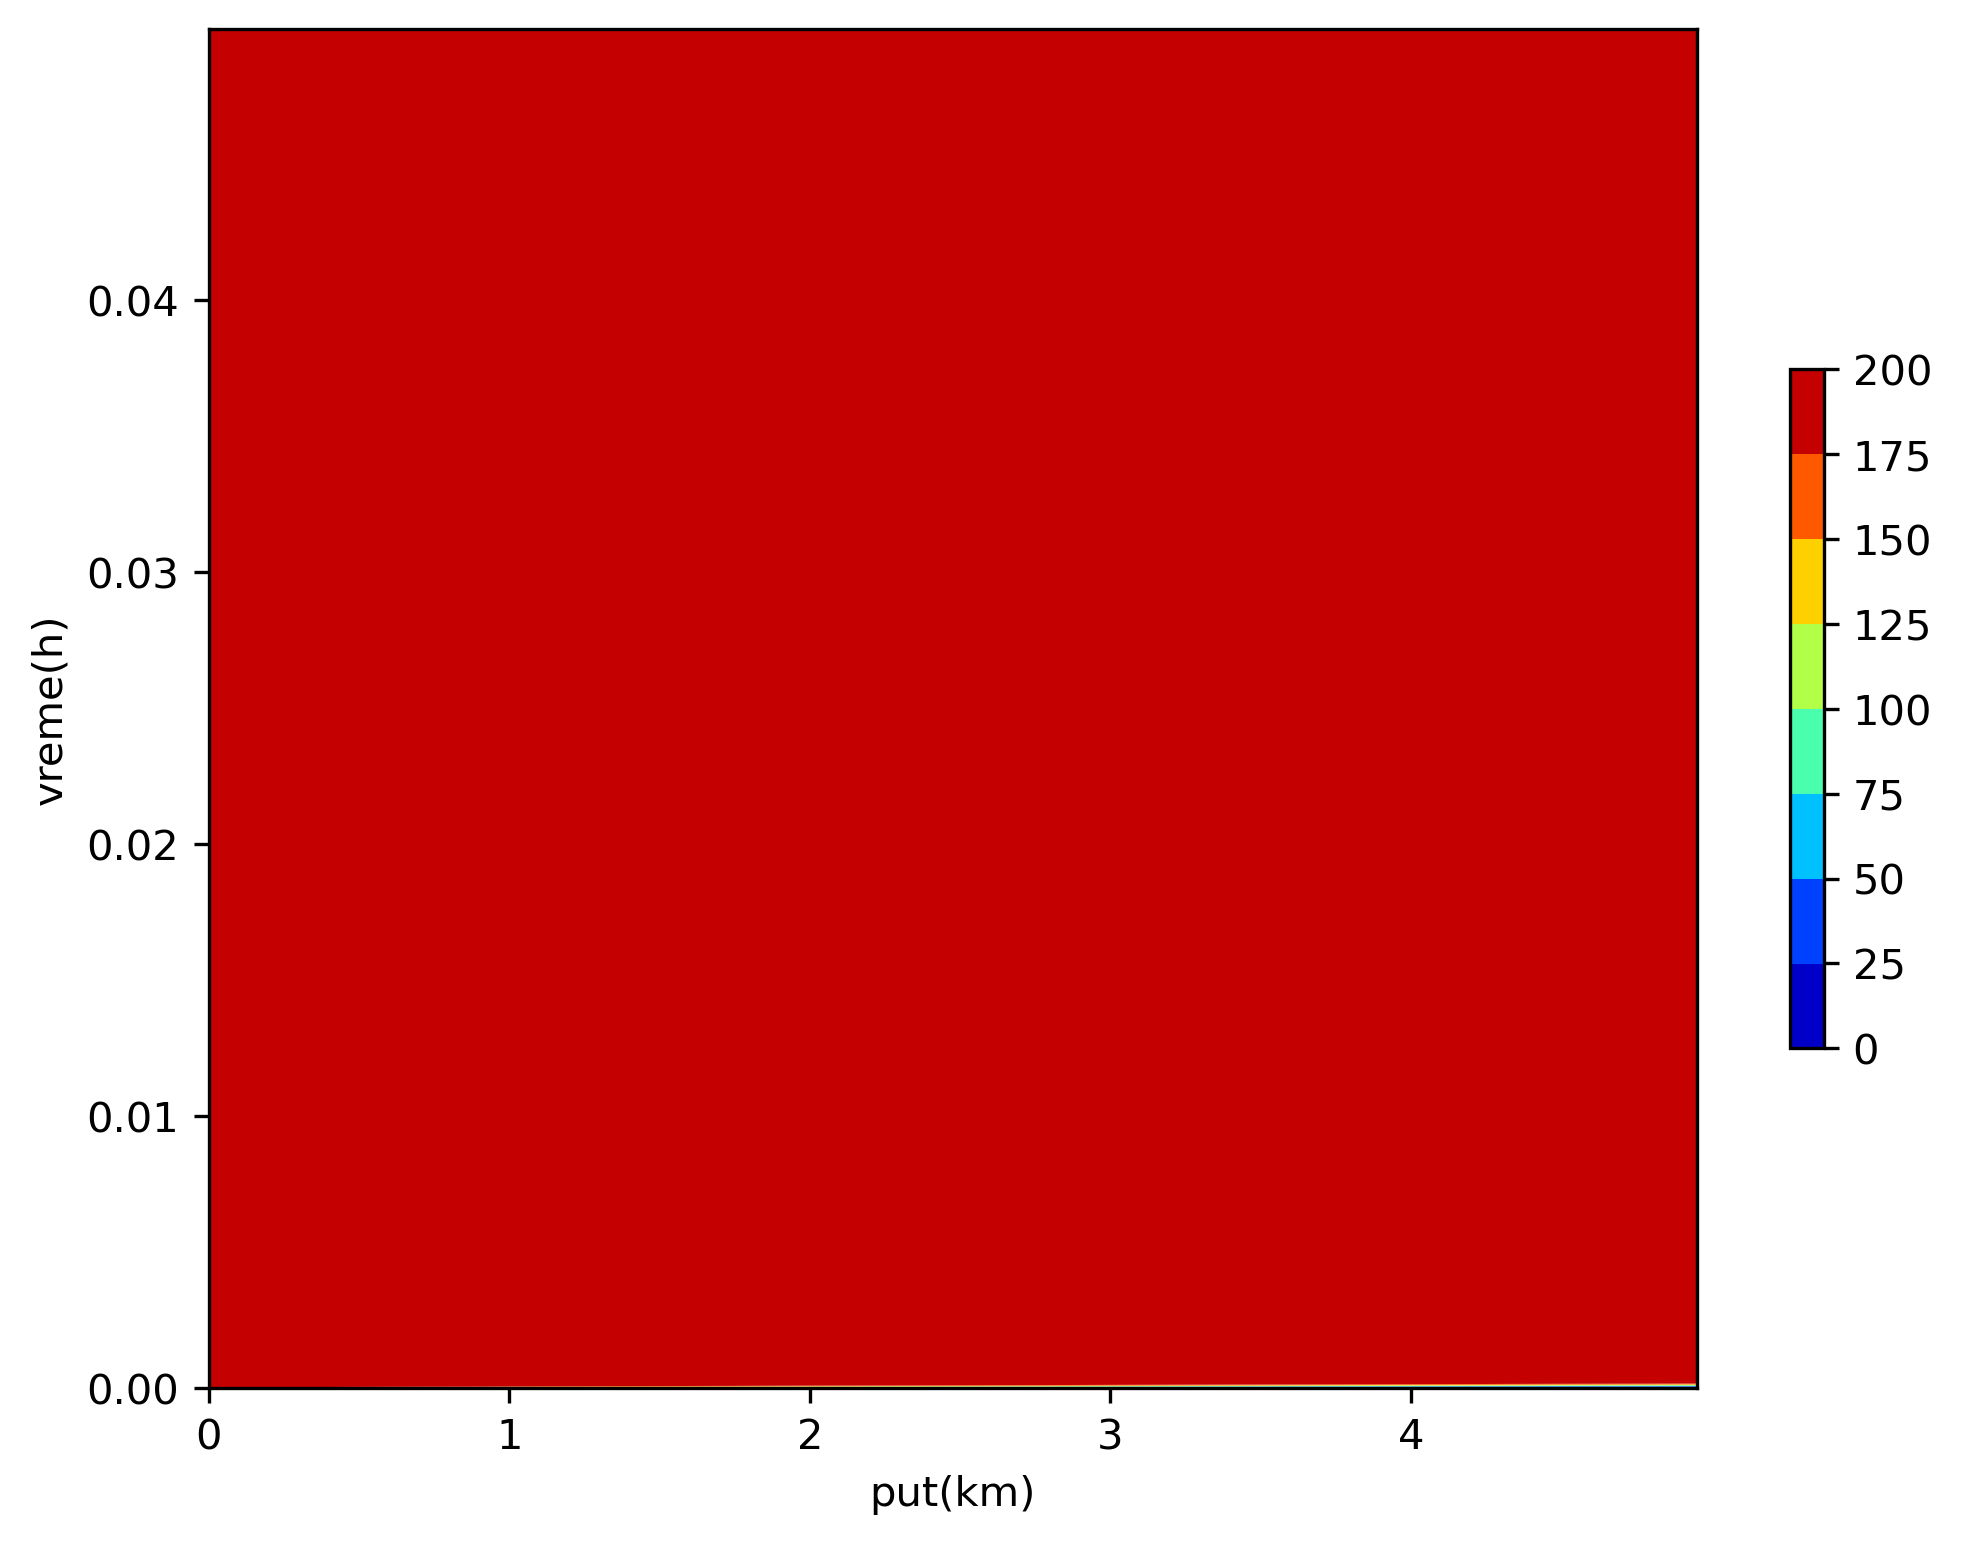

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# parametri
brzina = 60   # 60km/h
ceoPut = 5   # 5km
vreme = 0.05   # 180s = 3min = 1/20h = 0.05h
deltaX = 0.05   # 50 m = 0.05km
deltaT = 0.1 * (1/3600) # u satima

izdeljenPut = np.arange(0, ceoPut, deltaX)
izdeljenoVreme = np.arange(0, vreme, deltaT)

pocetniUslov = 200
granicniUslov = 200   # konstantan priliv vozila

# gustina
gustina = np.zeros(shape=(len(izdeljenoVreme), len(izdeljenPut)))   # vreme redovi, put kolone

gustina[0][0] = pocetniUslov
    
for i in range(len(gustina)):
    gustina[i][0] = granicniUslov

for i in range(1, len(gustina)):
    for j in range(1, len(gustina[i])):
        gustina[i][j] = gustina[i][j-1] - (brzina*deltaT)/deltaX * (gustina[i][j-1] - gustina[i-1][j])
        
izdeljenPut, izdeljenoVreme = np.meshgrid(izdeljenPut, izdeljenoVreme)

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.gca(projection='3d') # ose grafika - 3D projekcija
surf = ax.plot_surface(izdeljenPut, izdeljenoVreme, gustina, cmap=cm.jet, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10)) # podeli z-osu na 10 podeoka
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) # prikazuj vrednosti kao realne brojeve sa 2 decimale

# Dodavanje legende boja
fig.colorbar(surf, shrink=0.5, aspect=20) # da znamo koja boja je koja vrednost

# ispisivanje osa
ax.set_xlabel("$put(km)$")
ax.set_ylabel("$vreme(h)$")
ax.set_title("gustina(put, vreme)")

plt.show()

# konturni dijagram
fig = plt.figure(figsize=(8, 6), dpi=300)
cpl = plt.contourf(izdeljenPut, izdeljenoVreme, gustina, cmap=cm.jet, antialiased=True)

# dodavanje legende boja
fig.colorbar(cpl, shrink=0.5, aspect=20)
plt.xlabel("put(km)")
plt.ylabel("vreme(h)")
plt.show()

Uneti komentar.